In [1]:
import numpy as np
import pandas as pd

In [4]:
train_agg=pd.read_csv(r'C:\Users\Vincy Sagar\Desktop\Hackathons\HDFC\Updated Dataset\train_data\AggregateData_Train.csv')
train_tr=pd.read_csv(r'C:\Users\Vincy Sagar\Desktop\Hackathons\HDFC\Updated Dataset\train_data\TransactionData_Train.csv')
test_agg=pd.read_csv(r'C:\Users\Vincy Sagar\Desktop\Hackathons\HDFC\Updated Dataset\test_data\AggregateData_Test.csv')
test_tr=pd.read_csv(r'C:\Users\Vincy Sagar\Desktop\Hackathons\HDFC\Updated Dataset\test_data\TransactionData_Test.csv')
                                                                

In [142]:
pd.options.mode.chained_assignment=None
pd.options.display.max_columns=999

In [143]:
train_agg.head()

,UID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,bad_flag
0,Tr-1,30SEP2038,61P4S1M3GET,10397.75,?,?,?,?,?,?,197186.68,?,?,?,?,?,1548544.1,1631807.08,?,12,0,0,0,0,0,0,1,0,0,0,0,0,272,62,0,?,?,87170,0,0,2,?,?,?,?,?,5.04055,?,?,?,6,9,3,10,0
1,Tr-2,31JAN2038,6NYVS1J3U7M,?,606.74,?,?,?,?,?,?,?,?,?,?,?,80820.81,95790,?,0,2,0,0,0,0,0,0,0,0,0,0,0,14,7,0,?,?,?,0,0,0,?,?,0.28147,?,?,?,?,?,?,1,?,?,?,0
2,Tr-3,31APR2038,BLFB1KMS48,87452.89,963.52,?,?,13838,?,?,1081.25,6000,450,?,?,?,1076394.14,942897.18,?,32,21,0,0,2,0,0,4,6,1,0,0,0,81,64,0,?,?,?,0,0,0,0.18021,?,0.08960,1.28678,?,?,?,?,?,10,10,20,1,0
3,Tr-4,31NOV2038,MYGB1LCW8P,?,393.26,100000,?,?,?,?,?,?,?,?,?,?,61815.28,175245.51,?,0,1,1,0,0,0,0,0,0,0,0,0,0,8,14,0,?,?,?,0,0,0,?,?,0.15678,?,?,?,?,?,?,4,1,?,2,0
4,Tr-5,31OCT2038,6UG5S1PQGE5,1100,497.2,?,?,?,?,0.9,18640,?,?,?,?,?,1326452.17,1218970.65,?,1,7,0,0,0,0,1,1,0,0,0,0,0,34,137,0,?,?,60.9,0,0,2,?,?,0.03836,?,?,0.00470,?,?,0.00007,2,3,1,2,0


# Seperating test data which is same as train data

In [144]:
test_same=test_agg[test_agg.V2.isin(list(set(train_agg.V2)))]

In [145]:
test_agg.shape

(48434, 54)

In [146]:
test_same.shape

(48030, 54)

In [147]:
test_diff=test_agg[~test_agg.V2.isin(list(set(train_agg.V2)))]

In [148]:
test_diff.shape

(404, 54)

In [149]:
test_diff.head()

,UID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53
568,Te-569,31JUN2038,5LHA19JDF5G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,?,0,0,0,?,?,?,?,?,?,?,?,?,?,?,?,?
1541,Te-1542,31APR2039,MIBAD9PQ1I,?,114,?,?,?,?,?,?,?,?,?,?,?,?,40000,?,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,?,?,?,0,0,0,?,?,0.28419,?,?,?,?,?,?,?,?,?,?
1646,Te-1647,28MAY2038,61GFDOYJR7,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,?,0,0,0,?,?,?,?,?,?,?,?,?,?,?,?,?
1720,Te-1721,30JUL2038,61FVDOMMQ7TP,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,?,0,0,0,?,?,?,?,?,?,?,?,?,?,?,?,?
1929,Te-1930,31APR2038,6IGEDOPPUI9M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0.31,0,0,1,?,?,?,?,?,100.00000,?,?,?,?,?,?,?


# Creating Feature according to C2

In [5]:
train_tr.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,06JUL38:17:31:02,D,IAD,2038-12-30,30JUL38:00:00:00,OTHER,22000.0
1,9Y46ZBCWRP9,61CE41JD5YMP329,05MAY38:16:46:36,D,STD,2039-06-31,28MAY38:00:00:00,FT,8183.0
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,08FEB37:15:55:28,C,OCD,2038-04-31,30FEB37:00:00:00,CHQ,48900.0
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,24NOV38:09:48:37,D,EAW,2039-05-29,31NOV38:00:00:00,ATM,1500.0
4,5N5ASLGMMPM,6IPA43AM4Y613SX,26OCT38:18:54:06,D,ATW,2038-03-31,31OCT38:00:00:00,ATM,10000.0


In [150]:
train_tr1=train_tr.groupby('C2')['C12'].sum()
train_tr1=train_tr1.to_frame()
train_tr1=train_tr1.reset_index()

In [151]:
train_tr1.head()

,C2,C12
0,01444BK345,321683.00
1,01451CHSFI,52097189.22
2,01453CCPF6G,3242316.13
3,0145EKTVGVT,370432.00
4,0145S3AS46,6403208.16


In [152]:
train_tr1['V2']=train_tr1['C2']
train_tr1.drop('C2', axis=1, inplace=True)

In [153]:
train_agg_copy=train_agg.merge(train_tr1,on='V2', how='left' )

In [154]:
test_tr_diff=test_tr[test_tr.C2.isin(list(set(test_diff.V2)))]

In [155]:
test_tr_diff1=test_tr_diff.groupby('C2')['C12'].sum()
test_tr_diff1=test_tr_diff1.to_frame()
test_tr_diff1=test_tr_diff1.reset_index()

In [156]:
test_tr_diff1['V2']=test_tr_diff1['C2']
test_tr_diff1.drop('C2', axis=1, inplace=True)

In [157]:
test_diff=test_diff.merge(test_tr_diff1,on='V2', how='left' )

In [158]:
test_ag = test_diff.copy()

# Extracting features which have less than 90% missing values

In [159]:
test_ag = test_diff[['UID','V1' , 'V2', 'V4', 'V16', 'V17', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33',
       'V34', 'V38', 'V39', 'V40', 'V43','C12']]

In [160]:
from numpy import nan
test_ag.replace('?' , nan , inplace=True)

In [161]:
train_ag['V4'] = train_ag['V4'].astype(float)
train_ag['V4'].fillna(train_ag['V4'].mean() , inplace=True)

train_ag['V16'] = train_ag['V16'].astype(float)
train_ag['V16'].fillna(train_ag['V16'].mean() , inplace=True)

train_ag['V17'] = train_ag['V17'].astype(float)
train_ag['V17'].fillna(train_ag['V17'].mean() , inplace=True)

train_ag['V19'] = train_ag['V19'].astype(float)
train_ag['V19'].fillna(train_ag['V19'].mean() , inplace=True)

train_ag['V20'] =train_ag['V20'].astype(float)
train_ag['V20'].fillna(train_ag['V20'].mean() , inplace=True)

train_ag['V21'] = train_ag['V21'].astype(float)
train_ag['V21'].fillna(train_ag['V21'].mean() , inplace=True)

train_ag['V22'] = train_ag['V22'].astype(float)
train_ag['V22'].fillna(train_ag['V22'].mean() , inplace=True)

train_ag['V23'] = train_ag['V23'].astype(float)
train_ag['V23'].fillna(train_ag['V23'].mean() , inplace=True)

train_ag['V24'] = train_ag['V24'].astype(float)
train_ag['V24'].fillna(train_ag['V24'].mean() , inplace=True)

train_ag['V25'] = train_ag['V25'].astype(float)
train_ag['V25'].fillnatrain_ag['V25'].mean() , inplace=True)

train_ag['V26'] = train_ag['V26'].astype(float)
train_ag['V26'].fillna(train_ag['V26'].mean() , inplace=True)

train_ag['V27'] = train_ag['V27'].astype(float)
train_ag['V27'].fillna(train_ag['V27'].mean() , inplace=True)

train_ag['V28'] = train_ag['V28'].astype(float)
train_ag['V28'].fillna(train_ag['V28'].mean() , inplace=True)

train_ag['V29'] = train_ag['V29'].astype(float)
train_ag['V29'].fillna(train_ag['V29'].mean() , inplace=True)

train_ag['V30'] = train_ag['V30'].astype(float)
train_ag['V30'].fillna(train_ag['V30'].mean() , inplace=True)

train_ag['V31'] = train_ag['V31'].astype(float)
train_ag['V31'].fillna(train_ag['V31'].mean() , inplace=True)

train_ag['V32'] = train_ag['V32'].astype(float)
train_ag['V32'].fillna(train_ag['V32'].mean() , inplace=True)

train_ag['V33'] = train_ag['V33'].astype(float)
train_ag['V33'].fillna(train_ag['V33'].mean() , inplace=True)

train_ag['V34'] =train_ag['V34'].astype(float)
train_ag['V34'].fillna(train_ag['V34'].mean() , inplace=True)

train_ag['V38'] = train_ag['V38'].astype(float)
train_ag['V38'].fillna(train_ag['V38'].mean() , inplace=True)

train_ag['V39'] = test_ag['V39'].astype(float)
train_ag['V39'].fillna(train_ag['V39'].mean() , inplace=True)

train_ag['V40'] = train_ag['V40'].astype(float)
train_ag['V40'].fillna(train_ag['V40'].mean() , inplace=True)

train_ag['V43'] = train_ag['V43'].astype(float)
train_ag['V43'].fillna(train_ag['V43'].mean() , inplace=True)

In [162]:
test_diff = test_ag.copy()

In [163]:
test_ag = train_agg_copy.copy()

In [164]:
test_ag = test_ag[['UID','V1' , 'V2', 'V4', 'V16', 'V17', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33',
       'V34', 'V38', 'V39', 'V40', 'V43','C12']]

In [165]:
from numpy import nan
test_ag.replace('?' , nan , inplace=True)

In [166]:
test_ag['V4'] = test_ag['V4'].astype(float)
test_ag['V4'].fillna(test_ag['V4'].mean() , inplace=True)

test_ag['V16'] = test_ag['V16'].astype(float)
test_ag['V16'].fillna(test_ag['V16'].mean() , inplace=True)

test_ag['V17'] = test_ag['V17'].astype(float)
test_ag['V17'].fillna(test_ag['V17'].mean() , inplace=True)

test_ag['V19'] = test_ag['V19'].astype(float)
test_ag['V19'].fillna(test_ag['V19'].mean() , inplace=True)

test_ag['V20'] =test_ag['V20'].astype(float)
test_ag['V20'].fillna(test_ag['V20'].mean() , inplace=True)

test_ag['V21'] = test_ag['V21'].astype(float)
test_ag['V21'].fillna(test_ag['V21'].mean() , inplace=True)

test_ag['V22'] = test_ag['V22'].astype(float)
test_ag['V22'].fillna(test_ag['V22'].mean() , inplace=True)

test_ag['V23'] = test_ag['V23'].astype(float)
test_ag['V23'].fillna(test_ag['V23'].mean() , inplace=True)

test_ag['V24'] = test_ag['V24'].astype(float)
test_ag['V24'].fillna(test_ag['V24'].mean() , inplace=True)

test_ag['V25'] = test_ag['V25'].astype(float)
test_ag['V25'].fillna(test_ag['V25'].mean() , inplace=True)

test_ag['V26'] = test_ag['V26'].astype(float)
test_ag['V26'].fillna(test_ag['V26'].mean() , inplace=True)

test_ag['V27'] = test_ag['V27'].astype(float)
test_ag['V27'].fillna(test_ag['V27'].mean() , inplace=True)

test_ag['V28'] = test_ag['V28'].astype(float)
test_ag['V28'].fillna(test_ag['V28'].mean() , inplace=True)

test_ag['V29'] = test_ag['V29'].astype(float)
test_ag['V29'].fillna(test_ag['V29'].mean() , inplace=True)

test_ag['V30'] = test_ag['V30'].astype(float)
test_ag['V30'].fillna(test_ag['V30'].mean() , inplace=True)

test_ag['V31'] = test_ag['V31'].astype(float)
test_ag['V31'].fillna(test_ag['V31'].mean() , inplace=True)

test_ag['V32'] = test_ag['V32'].astype(float)
test_ag['V32'].fillna(test_ag['V32'].mean() , inplace=True)

test_ag['V33'] = test_ag['V33'].astype(float)
test_ag['V33'].fillna(test_ag['V33'].mean() , inplace=True)

test_ag['V34'] = test_ag['V34'].astype(float)
test_ag['V34'].fillna(test_ag['V34'].mean() , inplace=True)

test_ag['V38'] = test_ag['V38'].astype(float)
test_ag['V38'].fillna(test_ag['V38'].mean() , inplace=True)

test_ag['V39'] = test_ag['V39'].astype(float)
test_ag['V39'].fillna(test_ag['V39'].mean() , inplace=True)

test_ag['V40'] = test_ag['V40'].astype(float)
test_ag['V40'].fillna(test_ag['V40'].mean() , inplace=True)

test_ag['V43'] = test_ag['V43'].astype(float)
test_ag['V43'].fillna(test_ag['V43'].mean() , inplace=True)

In [167]:
train_agg_copy = test_ag.copy()

# Parsing the date time format

In [168]:
train_tr['C9']=train_tr['C9'].apply(lambda x: '30'+x[2:] if 'NOV' in x else x)
train_tr['C9']=train_tr['C9'].apply(lambda x: '28'+x[2:] if 'FEB' in x else x)
train_tr['C9']=train_tr['C9'].apply(lambda x: '30'+x[2:] if 'APR' in x else x)
train_tr['C9']=train_tr['C9'].apply(lambda x: '30'+x[2:] if 'JUN' in x else x)
train_tr['C9']=train_tr['C9'].apply(lambda x: '30'+x[2:] if 'SEP' in x else x)

train_tr['C4']=train_tr['C4'].apply(lambda x: '30'+x[2:] if 'NOV' in x else x)
train_tr['C4']=train_tr['C4'].apply(lambda x: '28'+x[2:] if 'FEB' in x else x)
train_tr['C4']=train_tr['C4'].apply(lambda x: '30'+x[2:] if 'APR' in x else x)
train_tr['C4']=train_tr['C4'].apply(lambda x: '30'+x[2:] if 'JUN' in x else x)
train_tr['C4']=train_tr['C4'].apply(lambda x: '30'+x[2:] if 'SEP' in x else x)

In [169]:
from datetime import datetime

train_tr['C4']=train_tr['C4'].apply(lambda x: datetime.strptime(x, '%d%b%y:%H:%M:%S') )
train_tr['C9']=train_tr['C9'].apply(lambda x: datetime.strptime(x, '%d%b%y:%H:%M:%S') )

In [170]:
train_tr['DayDiff'] = train_tr['C9'] - train_tr['C4']
train_tr['DayDiff']=train_tr['DayDiff'].apply(lambda x: x.days)
train_tr['DayDiff'].replace(-1 , 0, inplace=True)

In [171]:
train_tr1=train_tr.groupby('C2')['DayDiff'].sum()
train_tr1=train_tr1.to_frame()
train_tr1=train_tr1.reset_index()

In [172]:
train_tr1['V2']=train_tr1['C2']
train_tr1.drop('C2', axis=1, inplace=True)
train_agg_copy =train_agg_copy.merge(train_tr1,on='V2', how='left' )

In [173]:
test_tr_diff['C9']=test_tr_diff['C9'].apply(lambda x: '30'+x[2:] if 'NOV' in x else x)
test_tr_diff['C9']=test_tr_diff['C9'].apply(lambda x: '28'+x[2:] if 'FEB' in x else x)
test_tr_diff['C9']=test_tr_diff['C9'].apply(lambda x: '30'+x[2:] if 'APR' in x else x)
test_tr_diff['C9']=test_tr_diff['C9'].apply(lambda x: '30'+x[2:] if 'JUN' in x else x)
test_tr_diff['C9']=test_tr_diff['C9'].apply(lambda x: '30'+x[2:] if 'SEP' in x else x)

test_tr_diff['C4']=test_tr_diff['C4'].apply(lambda x: '30'+x[2:] if 'NOV' in x else x)
test_tr_diff['C4']=test_tr_diff['C4'].apply(lambda x: '28'+x[2:] if 'FEB' in x else x)
test_tr_diff['C4']=test_tr_diff['C4'].apply(lambda x: '30'+x[2:] if 'APR' in x else x)
test_tr_diff['C4']=test_tr_diff['C4'].apply(lambda x: '30'+x[2:] if 'JUN' in x else x)
test_tr_diff['C4']=test_tr_diff['C4'].apply(lambda x: '30'+x[2:] if 'SEP' in x else x)

In [174]:
from datetime import datetime

test_tr_diff['C4']=test_tr_diff['C4'].apply(lambda x: datetime.strptime(x, '%d%b%y:%H:%M:%S') )
test_tr_diff['C9']=test_tr_diff['C9'].apply(lambda x: datetime.strptime(x, '%d%b%y:%H:%M:%S') )

In [175]:
test_tr_diff['DayDiff'] =test_tr_diff['C4'] - test_tr_diff['C9']
test_tr_diff['DayDiff']=test_tr_diff['DayDiff'].apply(lambda x: x.days)
test_tr_diff['DayDiff'].replace(-1 , 0, inplace=True)

In [176]:
test_tr_diff['DayDiff'] = test_tr_diff['DayDiff'].abs()

In [177]:
test_tr_diff_1=test_tr_diff.groupby('C2')['DayDiff'].sum()
test_tr_diff_1=test_tr_diff_1.to_frame()
test_tr_diff_1=test_tr_diff_1.reset_index()

In [178]:
test_tr_diff_1['V2']=test_tr_diff_1['C2']
test_tr_diff_1.drop('C2', axis=1, inplace=True)
test_diff_copy =test_diff.merge(test_tr_diff_1,on='V2', how='left' )

In [179]:
train1 = train_tr.copy()
train1['V2'] = train1['C2']
train1.drop('C2',axis=1 , inplace=True)
train1 = train1.groupby(['V2'])['C12'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train1['F2'] = train1['C12']
train1.drop('C12',axis=1,inplace=True)

train1 = train1.groupby(['V2'])['F2'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

In [180]:
train_agg_copy = train_agg_copy.merge(train1,on=['V2'],how='left')

In [181]:
train1 = test_tr_diff.copy()
train1['V2'] = train1['C2']
train1.drop('C2',axis=1 , inplace=True)
train1 = train1.groupby(['V2'])['C12'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train1['F2'] = train1['C12']
train1.drop('C12',axis=1,inplace=True)

train1 = train1.groupby(['V2'])['F2'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()


In [182]:
test_diff_copy = test_diff_copy.merge(train1,on=['V2'],how='left')

In [183]:
test = test_diff_copy.copy()

In [184]:
train = train_agg_copy.copy()

In [185]:
train.shape , test.shape

((26775, 29), (404, 29))

In [186]:
teuid = test['UID']


In [187]:
#####################################    V2 and C5  create F2_5

In [188]:
train_tr.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12,DayDiff
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,2038-07-06 17:31:02,D,IAD,2038-12-30,2038-07-30,OTHER,22000.0,23
1,9Y46ZBCWRP9,61CE41JD5YMP329,2038-05-05 16:46:36,D,STD,2039-06-31,2038-05-28,FT,8183.0,22
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,2037-02-28 15:55:28,C,OCD,2038-04-31,2037-02-28,CHQ,48900.0,0
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,2038-11-30 09:48:37,D,EAW,2039-05-29,2038-11-30,ATM,1500.0,0
4,5N5ASLGMMPM,6IPA43AM4Y613SX,2038-10-26 18:54:06,D,ATW,2038-03-31,2038-10-31,ATM,10000.0,4


In [189]:
#train = train_agg_copy.copy()

train_tr['V2'] = train_tr['C2']

In [190]:
train1 = train_tr.copy()

train1 = train1.groupby(['V2', 'C5'])['C12'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train1['F2_5'] =train1['C12']
train1.drop('C12',axis=1,inplace=True)

train1 = train1.groupby(['V2'])['F2_5'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train = train.merge(train1,on=['V2'],how='left')

In [191]:
#####################################    V2 and C6  create F2_6

In [192]:
train_tr.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12,DayDiff,V2
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,2038-07-06 17:31:02,D,IAD,2038-12-30,2038-07-30,OTHER,22000.0,23,6UGH4BMM1Y6P
1,9Y46ZBCWRP9,61CE41JD5YMP329,2038-05-05 16:46:36,D,STD,2039-06-31,2038-05-28,FT,8183.0,22,9Y46ZBCWRP9
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,2037-02-28 15:55:28,C,OCD,2038-04-31,2037-02-28,CHQ,48900.0,0,6Z4F3BPVME6
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,2038-11-30 09:48:37,D,EAW,2039-05-29,2038-11-30,ATM,1500.0,0,6UYF21TDMPPT
4,5N5ASLGMMPM,6IPA43AM4Y613SX,2038-10-26 18:54:06,D,ATW,2038-03-31,2038-10-31,ATM,10000.0,4,5N5ASLGMMPM


In [193]:
train1 = train_tr.copy()
train1 = train1.groupby(['V2', 'C6'])['C12'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train1['F2_6'] =train1['C12']
train1.drop('C12',axis=1,inplace=True)

train1 = train1.groupby(['V2'])['F2_6'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train = train.merge(train1,on=['V2'],how='left')

In [194]:
#####################################    V2 and C10  create F2_10

In [195]:
train1 = train_tr.copy()
train1 = train1.groupby(['V2', 'C10'])['C12'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train1['F2_10'] =train1['C12']
train1.drop('C12',axis=1,inplace=True)

train1 = train1.groupby(['V2'])['F2_10'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train = train.merge(train1,on=['V2'],how='left')

In [196]:
train.head()

,UID,V1,V2,V4,V16,V17,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V38,V39,V40,V43,C12,DayDiff,F2,F2_5,F2_6,F2_10
0,Tr-1,30SEP2038,61P4S1M3GET,16145.990895,1548544.10,1631807.08,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,272.0,62.0,0.0,0.0,0.0,2.0,7.473577,4620517.92,2183,10820.885059,13686.257301,28640.244214,27351.973240
1,Tr-2,31JAN2038,6NYVS1J3U7M,606.740000,80820.81,95790.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,0.0,0.0,0.0,0.281470,837478.56,537,10736.904615,11509.681493,9395.224286,8740.845388
2,Tr-3,31APR2038,BLFB1KMS48,963.520000,1076394.14,942897.18,32.0,21.0,0.0,0.0,2.0,0.0,0.0,4.0,6.0,1.0,0.0,0.0,0.0,81.0,64.0,0.0,0.0,0.0,0.0,0.089600,1388481.98,1146,10847.515469,11019.175305,13651.339123,10793.736902
3,Tr-4,31NOV2038,MYGB1LCW8P,393.260000,61815.28,175245.51,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0,0.0,0.0,0.0,0.0,0.156780,441850.46,776,10776.840488,11555.225061,14340.833819,13092.428776
4,Tr-5,31OCT2038,6UG5S1PQGE5,497.200000,1326452.17,1218970.65,1.0,7.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,137.0,0.0,0.0,0.0,2.0,0.038360,2417476.55,2372,11192.021065,16111.649108,14015.112542,9531.143825


In [197]:
########################################     Test Diff

In [198]:
test_tr_diff.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12,DayDiff
1127,68GB2KA35I96,61HV4QHV85WTJBX,2038-07-01 07:08:14,C,CIN,2039-06-31,2038-06-30,Interest,562.0,1
10506,VY54D9P34I,6XPA4QHVF86PWIY,2038-07-01 09:02:14,C,CIN,2038-09-30,2038-06-30,Interest,19.0,1
32414,68F42KCS8ETM,6YH43LPVR656O4K,2037-01-04 12:31:36,D,ASD,2038-08-31,2037-01-31,CHG,326.0,27
33939,6YCFDLAVM99E,6XBE4QH9M556A41,2038-07-01 08:09:41,C,CIN,2038-02-30,2038-06-30,Interest,202.0,1
41217,V846SKGQ1IP,6XF63LASGY513I1,2037-01-01 03:29:21,C,CIN,2038-04-31,2037-12-30,Interest,4.0,363


In [199]:
tte = test_tr_diff.copy()

In [200]:
tt1 = tte.copy()
tt1['V2'] = tt1['C2']
tt1.drop('C2',axis=1,inplace=True)

In [201]:
################################################   V2 and C5

In [202]:
train1 = tt1.copy()
train1 = train1.groupby(['V2', 'C5'])['C12'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train1['F2_5'] =train1['C12']
train1.drop('C12',axis=1,inplace=True)

train1 = train1.groupby(['V2'])['F2_5'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

test = test.merge(train1,on=['V2'],how='left')

In [203]:
################################################   V2 and C6    AND   V2 and C10

In [204]:
train1 = tt1.copy()
train1 = train1.groupby(['V2', 'C6'])['C12'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train1['F2_6'] =train1['C12']
train1.drop('C12',axis=1,inplace=True)

train1 = train1.groupby(['V2'])['F2_6'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

test = test.merge(train1,on=['V2'],how='left')

####################################################################################

train1 = tt1.copy()
train1 = train1.groupby(['V2', 'C10'])['C12'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

train1['F2_10'] =train1['C12']
train1.drop('C12',axis=1,inplace=True)

train1 = train1.groupby(['V2'])['F2_10'].mean()
train1 = train1.to_frame()
train1 = train1.reset_index()

test = test.merge(train1,on=['V2'],how='left')


In [205]:
test.head()

,UID,V1,V2,V4,V16,V17,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V38,V39,V40,V43,C12,DayDiff,F2,F2_5,F2_6,F2_10
0,Te-569,31JUN2038,5LHA19JDF5G,814.48791,4.301553e+06,4.960161e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.432831,1803371.73,478,62185.232069,62846.819928,70445.465476,86444.430926
1,Te-1542,31APR2039,MIBAD9PQ1I,114.00000,4.301553e+06,4.000000e+04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.284190,43238.00,372,10809.500000,10809.500000,13892.000000,13892.000000
2,Te-1647,28MAY2038,61GFDOYJR7,814.48791,4.301553e+06,4.960161e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.432831,628.00,364,314.000000,314.000000,314.000000,314.000000
3,Te-1721,30JUL2038,61FVDOMMQ7TP,814.48791,4.301553e+06,4.960161e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.432831,95529.00,416,19105.800000,22171.500000,19146.500000,19146.500000
4,Te-1930,31APR2038,6IGEDOPPUI9M,814.48791,4.301553e+06,4.960161e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51.432831,2.62,728,0.655000,0.655000,0.655000,0.655000


In [206]:
train_agg_copy = train.copy()
test_diff_copy = test.copy()

In [207]:
truid = train_agg_copy['UID']
trV1 = train_agg_copy['V1']
trV2 = train_agg_copy['V2']
y = train_agg['bad_flag']

train_agg_copy.drop(['UID','V1'] , axis=1 , inplace=True)

teuid = test_diff_copy['UID']
teV1 = test_diff_copy['V1']
teV2 = test_diff_copy['V2']

test_diff_copy.drop(['UID','V1'] , axis=1 , inplace=True)

In [208]:
train_agg_copy.shape , test_diff_copy.shape

((26775, 30), (404, 30))

In [209]:
train =   train_agg_copy.copy()
test  =   test_diff_copy.copy()

In [210]:
#######################################   Working on C10

In [211]:
train_tr_dummy=train_tr.groupby(['C2', 'C10'])['C12'].sum()

In [212]:
train_tr_dummy=train_tr_dummy.to_frame()
train_tr_dummy=train_tr_dummy.reset_index()

In [213]:
train_tr_dummy1=train_tr_dummy[train_tr_dummy['C10']=='ATM'].groupby('C2')['C12'].sum()
train_tr_dummy1=train_tr_dummy1.to_frame()
train_tr_dummy1=train_tr_dummy1.reset_index()

In [214]:
train_tr_dummy1.columns=['V2', 'ATM']

In [215]:
train_tr_dummy1.head()

,V2,ATM
0,01444BK345,133799.0
1,01453CCPF6G,212900.0
2,0145EKTVGVT,21000.0
3,0145S3AS46,793000.0
4,0145ZLJVMV9,124069.0


In [216]:
train_tr_dummy2=train_tr_dummy[train_tr_dummy['C10']=='CHG'].groupby('C2')['C12'].sum()
train_tr_dummy2=train_tr_dummy2.to_frame()
train_tr_dummy2=train_tr_dummy2.reset_index()

In [217]:
train_tr_dummy2.columns=['V2', 'CHG']

In [218]:
train_tr_dummy3=train_tr_dummy[train_tr_dummy['C10']=='CMS'].groupby('C2')['C12'].sum()
train_tr_dummy3=train_tr_dummy3.to_frame()
train_tr_dummy3=train_tr_dummy3.reset_index()
train_tr_dummy3.columns=['V2', 'CMS']
train_tr_dummy3.head()

,V2,CMS
0,01453CCPF6G,60000.00
1,01FH39T98IN,75025.00
2,01GA11KMF6T,15809168.00
3,01H6ZQMV59T,148972.00
4,01P5E1GWU7W,112.36


In [219]:
train_tr_dummy4=train_tr_dummy[train_tr_dummy['C10']=='CHQ'].groupby('C2')['C12'].sum()
train_tr_dummy4=train_tr_dummy4.to_frame()
train_tr_dummy4=train_tr_dummy4.reset_index()
train_tr_dummy4.columns=['V2', 'CHQ']
train_tr_dummy4.head()

,V2,CHQ
0,01444BK345,147374.0
1,01451CHSFI,28539639.0
2,01453CCPF6G,629546.0
3,0145S3AS46,3739221.0
4,0145SBMQQ5N,9212378.0


In [220]:
train_tr_dummy5=train_tr_dummy[train_tr_dummy['C10']=='Deal pro'].groupby('C2')['C12'].sum()
train_tr_dummy5=train_tr_dummy5.to_frame()
train_tr_dummy5=train_tr_dummy5.reset_index()
train_tr_dummy5.columns=['V2', 'Deal pro']
train_tr_dummy5.head()

,V2,Deal pro
0,01B5C3G3QIM,373.24
1,01FH39T98IN,50794.73
2,01H6ZQMV59T,18953180.85
3,0655SLJDQI,1134669.05
4,06H5CQGD5P5,1083976.05


In [221]:
train_tr_dummy6=train_tr_dummy[train_tr_dummy['C10']=='ECS'].groupby('C2')['C12'].sum()
train_tr_dummy6=train_tr_dummy6.to_frame()
train_tr_dummy6=train_tr_dummy6.reset_index()
train_tr_dummy6.columns=['V2', 'ECS']
train_tr_dummy6.head()

,V2,ECS
0,0LPACQJ3QVW,67871.0
1,0ZC6DCYPR54,5000.0
2,5IH64CP9MYT,31212.0
3,61FA4LTM88PH,2807.0
4,66FA39K3Q76P,1738.0


In [222]:
train_tr_dummy7=train_tr_dummy[train_tr_dummy['C10']=='ENET'].groupby('C2')['C12'].sum()
train_tr_dummy7=train_tr_dummy7.to_frame()
train_tr_dummy7=train_tr_dummy7.reset_index()
train_tr_dummy7.columns=['V2', 'ENET']
train_tr_dummy7.head()

,V2,ENET
0,01H6ZQMV59T,1000.0
1,0ZY521AD5E6,800000.0
2,58P5EBPQG86,100000.0
3,615A5CG3GEP,335825.0
4,61GB2QPJ154B,7786899.0


In [223]:
train_tr_dummy8=train_tr_dummy[train_tr_dummy['C10']=='FCC'].groupby('C2')['C12'].sum()
train_tr_dummy8=train_tr_dummy8.to_frame()
train_tr_dummy8=train_tr_dummy8.reset_index()
train_tr_dummy8.columns=['V2', 'FCC']
train_tr_dummy8.head()

,V2,FCC
0,5NY6EOHWR5P,295.2
1,61GW4CKJM55T,1028.5
2,6LBWZ1GSQPNE,63.3
3,6LCEDQPP8PG6,737.6
4,6UB54LJ3594E,369.0


In [224]:
train_tr_dummy9=train_tr_dummy[train_tr_dummy['C10']=='FT'].groupby('C2')['C12'].sum()
train_tr_dummy9=train_tr_dummy9.to_frame()
train_tr_dummy9=train_tr_dummy9.reset_index()
train_tr_dummy9.columns=['V2', 'FT']
train_tr_dummy9.head()

,V2,FT
0,01444BK345,21800.00
1,01451CHSFI,21226578.00
2,01453CCPF6G,8000.00
3,0145EKTVGVT,60000.00
4,0145S3AS46,478382.25


In [225]:
train_tr_dummy10=train_tr_dummy[train_tr_dummy['C10']=='IMPS'].groupby('C2')['C12'].sum()
train_tr_dummy10=train_tr_dummy10.to_frame()
train_tr_dummy10=train_tr_dummy10.reset_index()
train_tr_dummy10.columns=['V2', 'IMPS']
train_tr_dummy10.head()

,V2,IMPS
0,01BA2BPPG94,78915.0
1,01CHZLYWQ96,30250.0
2,01FAEKCP5P4,200.0
3,01FH39T98IN,18320.0
4,01H6CHJS1IW,99500.0


In [226]:
train_tr_dummy11=train_tr_dummy[train_tr_dummy['C10']=='Interest'].groupby('C2')['C12'].sum()
train_tr_dummy11=train_tr_dummy11.to_frame()
train_tr_dummy11=train_tr_dummy11.reset_index()
train_tr_dummy11.columns=['V2', 'Interest']
train_tr_dummy11.head()

,V2,Interest
0,01453CCPF6G,276.0
1,0145EKTVGVT,118.0
2,0145S3AS46,5416.0
3,0145ZLJVMV9,917.0
4,01461OKW59M,4713.0


In [227]:
train_tr_dummy12=train_tr_dummy[train_tr_dummy['C10']=='TAX'].groupby('C2')['C12'].sum()
train_tr_dummy12=train_tr_dummy12.to_frame()
train_tr_dummy12=train_tr_dummy12.reset_index()
train_tr_dummy12.columns=['V2', 'TAX']
train_tr_dummy12.head()

,V2,TAX
0,01451CHSFI,872.13
1,01FE2HT3U,170.10
2,01FHSCM3MI5,6.18
3,01H631C94,29.17
4,01HAZOCSQP,6.18


In [228]:
train_tr_dummy13=train_tr_dummy[train_tr_dummy['C10']=='SWEEP'].groupby('C2')['C12'].sum()
train_tr_dummy13=train_tr_dummy13.to_frame()
train_tr_dummy13=train_tr_dummy13.reset_index()
train_tr_dummy13.columns=['V2', 'SWEEP']
train_tr_dummy13.head()

,V2,SWEEP
0,01453CCPF6G,3000.0
1,01463LKP159,55000.0
2,014A49JQU8T,6000.0
3,01553CY9M6P,3000.0
4,01BA2KTQ46G,12000.0


In [229]:
train_tr_dummy14=train_tr_dummy[train_tr_dummy['C10']=='RTGS'].groupby('C2')['C12'].sum()
train_tr_dummy14=train_tr_dummy14.to_frame()
train_tr_dummy14=train_tr_dummy14.reset_index()
train_tr_dummy14.columns=['V2', 'RTGS']
train_tr_dummy14.head()

train_tr_dummy15=train_tr_dummy[train_tr_dummy['C10']=='NEFT'].groupby('C2')['C12'].sum()
train_tr_dummy15=train_tr_dummy15.to_frame()
train_tr_dummy15=train_tr_dummy15.reset_index()
train_tr_dummy15.columns=['V2', 'NEFT']
train_tr_dummy15.head()

train_tr_dummy16=train_tr_dummy[train_tr_dummy['C10']=='OTHER'].groupby('C2')['C12'].sum()
train_tr_dummy16=train_tr_dummy16.to_frame()
train_tr_dummy16=train_tr_dummy16.reset_index()
train_tr_dummy16.columns=['V2', 'OTHER']
train_tr_dummy16.head()

,V2,OTHER
0,01444BK345,5500.00
1,01451CHSFI,2180340.79
2,01453CCPF6G,2096944.10
3,0145EKTVGVT,113314.00
4,0145S3AS46,1216924.30


In [230]:
train.head()

,V2,V4,V16,V17,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V38,V39,V40,V43,C12,DayDiff,F2,F2_5,F2_6,F2_10
0,61P4S1M3GET,16145.990895,1548544.10,1631807.08,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,272.0,62.0,0.0,0.0,0.0,2.0,7.473577,4620517.92,2183,10820.885059,13686.257301,28640.244214,27351.973240
1,6NYVS1J3U7M,606.740000,80820.81,95790.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,0.0,0.0,0.0,0.281470,837478.56,537,10736.904615,11509.681493,9395.224286,8740.845388
2,BLFB1KMS48,963.520000,1076394.14,942897.18,32.0,21.0,0.0,0.0,2.0,0.0,0.0,4.0,6.0,1.0,0.0,0.0,0.0,81.0,64.0,0.0,0.0,0.0,0.0,0.089600,1388481.98,1146,10847.515469,11019.175305,13651.339123,10793.736902
3,MYGB1LCW8P,393.260000,61815.28,175245.51,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0,0.0,0.0,0.0,0.0,0.156780,441850.46,776,10776.840488,11555.225061,14340.833819,13092.428776
4,6UG5S1PQGE5,497.200000,1326452.17,1218970.65,1.0,7.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,137.0,0.0,0.0,0.0,2.0,0.038360,2417476.55,2372,11192.021065,16111.649108,14015.112542,9531.143825


In [231]:
train['V2'] = train_agg['V2']

In [232]:
train_tr_dummy.head()

,C2,C10,C12
0,01444BK345,ATM,133799.0
1,01444BK345,CHQ,147374.0
2,01444BK345,FT,21800.0
3,01444BK345,NEFT,13210.0
4,01444BK345,OTHER,5500.0


In [233]:
train_tr_dummy17=train_tr[train_tr['C5']=='C'].groupby('C2')['C12'].sum()
train_tr_dummy17=train_tr_dummy17.to_frame()
train_tr_dummy17=train_tr_dummy17.reset_index()
train_tr_dummy17.columns=['V2', 'C']
train_tr_dummy17.head()

,V2,C
0,01444BK345,110884.00
1,01451CHSFI,26071932.79
2,01453CCPF6G,1722224.30
3,0145EKTVGVT,172318.00
4,0145S3AS46,3514485.15


In [234]:
train_tr_dummy18=train_tr[train_tr['C5']=='D'].groupby('C2')['C12'].sum()
train_tr_dummy18=train_tr_dummy18.to_frame()
train_tr_dummy18=train_tr_dummy18.reset_index()
train_tr_dummy18.columns=['V2', 'D']
train_tr_dummy18.head()

,V2,D
0,01444BK345,210799.00
1,01451CHSFI,26025256.43
2,01453CCPF6G,1520091.83
3,0145EKTVGVT,198114.00
4,0145S3AS46,2888723.01


In [235]:
train_agg_copy = train.copy()

In [236]:
train_agg_copy.head()

,V2,V4,V16,V17,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V38,V39,V40,V43,C12,DayDiff,F2,F2_5,F2_6,F2_10
0,61P4S1M3GET,16145.990895,1548544.10,1631807.08,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,272.0,62.0,0.0,0.0,0.0,2.0,7.473577,4620517.92,2183,10820.885059,13686.257301,28640.244214,27351.973240
1,6NYVS1J3U7M,606.740000,80820.81,95790.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,0.0,0.0,0.0,0.281470,837478.56,537,10736.904615,11509.681493,9395.224286,8740.845388
2,BLFB1KMS48,963.520000,1076394.14,942897.18,32.0,21.0,0.0,0.0,2.0,0.0,0.0,4.0,6.0,1.0,0.0,0.0,0.0,81.0,64.0,0.0,0.0,0.0,0.0,0.089600,1388481.98,1146,10847.515469,11019.175305,13651.339123,10793.736902
3,MYGB1LCW8P,393.260000,61815.28,175245.51,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0,0.0,0.0,0.0,0.0,0.156780,441850.46,776,10776.840488,11555.225061,14340.833819,13092.428776
4,6UG5S1PQGE5,497.200000,1326452.17,1218970.65,1.0,7.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,137.0,0.0,0.0,0.0,2.0,0.038360,2417476.55,2372,11192.021065,16111.649108,14015.112542,9531.143825


In [237]:
train_agg_copy=train_agg_copy.merge(train_tr_dummy1, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy2, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy3, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy4, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy5, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy6, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy7, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy8, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy9, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy10, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy11, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy12, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy13, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy14, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy15, on='V2', how='left')
train_agg_copy=train_agg_copy.merge(train_tr_dummy16, on='V2', how='left')

#train_agg_copy=train_agg_copy.merge(train_tr_dummy17, on='V2', how='left')
#train_agg_copy=train_agg_copy.merge(train_tr_dummy18, on='V2', how='left')

In [238]:
train = train_agg_copy.copy()

In [239]:
train_agg_copy.fillna(0, axis=1, inplace=True)
train.fillna(0, axis=1, inplace=True)

In [240]:
train.drop(['ECS','FCC'],axis=1,inplace=True)       ############## Feature not present in test

In [241]:
######################################      Test C10

In [242]:
test_diff_copy['V2'] = test_diff['V2']

In [243]:
test_tr_diff['C10'].unique()

array(['Interest', 'CHG', 'FT', 'TAX', 'CHQ', 'OTHER', 'SWEEP', 'ATM',
       'NEFT', 'RTGS', 'Deal pro', 'ENET', 'IMPS', 'CMS'], dtype=object)

In [244]:
test_tr_dummy1=test_tr_diff[test_tr_diff['C10']=='Interest'].groupby('C2')['C12'].sum()
test_tr_dummy1=test_tr_dummy1.to_frame()
test_tr_dummy1=test_tr_dummy1.reset_index()
test_tr_dummy1.columns=['V2', 'Interest']
test_tr_dummy1.head()

,V2,Interest
0,01C649MV5PW,16.0
1,01G643JJFVN,2.0
2,01G6SQCMF55,4880.0
3,06C62HKQF9,787.0
4,0856DLPQ1IG,79.0


In [245]:
test_tr_dummy2=test_tr_diff[test_tr_diff['C10']=='CHG'].groupby('C2')['C12'].sum()
test_tr_dummy2=test_tr_dummy2.to_frame()
test_tr_dummy2=test_tr_dummy2.reset_index()
test_tr_dummy2.columns=['V2', 'CHG']
test_tr_dummy2.head()

test_tr_dummy3=test_tr_diff[test_tr_diff['C10']=='FT'].groupby('C2')['C12'].sum()
test_tr_dummy3=test_tr_dummy3.to_frame()
test_tr_dummy3=test_tr_dummy3.reset_index()
test_tr_dummy3.columns=['V2', 'FT']
test_tr_dummy3.head()

test_tr_dummy4=test_tr_diff[test_tr_diff['C10']=='TAX'].groupby('C2')['C12'].sum()
test_tr_dummy4=test_tr_dummy4.to_frame()
test_tr_dummy4=test_tr_dummy4.reset_index()
test_tr_dummy4.columns=['V2', 'TAX']
test_tr_dummy4.head()

test_tr_dummy5=test_tr_diff[test_tr_diff['C10']=='CHQ'].groupby('C2')['C12'].sum()
test_tr_dummy5=test_tr_dummy5.to_frame()
test_tr_dummy5=test_tr_dummy5.reset_index()
test_tr_dummy5.columns=['V2', 'CHQ']
test_tr_dummy5.head()


,V2,CHQ
0,01PWC3MVG7W,4993633.0
1,0IP65CT94I,130442.0
2,0NYF23AM8YG,7770.0
3,0YF5CQCDF74,225110.0
4,0YQW5LGDRYN,2901769.0


In [246]:
test_tr_dummy6=test_tr_diff[test_tr_diff['C10']=='OTHER'].groupby('C2')['C12'].sum()
test_tr_dummy6=test_tr_dummy6.to_frame()
test_tr_dummy6=test_tr_dummy6.reset_index()
test_tr_dummy6.columns=['V2', 'OTHER']
test_tr_dummy6.head()

test_tr_dummy7=test_tr_diff[test_tr_diff['C10']=='SWEEP'].groupby('C2')['C12'].sum()
test_tr_dummy7=test_tr_dummy7.to_frame()
test_tr_dummy7=test_tr_dummy7.reset_index()
test_tr_dummy7.columns=['V2', 'SWEEP']
test_tr_dummy7.head()

test_tr_dummy8=test_tr_diff[test_tr_diff['C10']=='RTGS'].groupby('C2')['C12'].sum()
test_tr_dummy8=test_tr_dummy8.to_frame()
test_tr_dummy8=test_tr_dummy8.reset_index()
test_tr_dummy8.columns=['V2', 'RTGS']
test_tr_dummy8.head()

test_tr_dummy9=test_tr_diff[test_tr_diff['C10']=='ATM'].groupby('C2')['C12'].sum()
test_tr_dummy9=test_tr_dummy9.to_frame()
test_tr_dummy9=test_tr_dummy9.reset_index()
test_tr_dummy9.columns=['V2', 'ATM']
test_tr_dummy9.head()

test_tr_dummy10=test_tr_diff[test_tr_diff['C10']=='NEFT'].groupby('C2')['C12'].sum()
test_tr_dummy10=test_tr_dummy10.to_frame()
test_tr_dummy10=test_tr_dummy10.reset_index()
test_tr_dummy10.columns=['V2', 'NEFT']
test_tr_dummy10.head()

,V2,NEFT
0,01B6SKHJ49G,125000.0
1,01PWC3MVG7W,5750305.0
2,0IP65CT94I,20000.0
3,0YF5CQCDF74,77000.0
4,0YQHS9HVU8P,97450.0


In [247]:
test_tr_dummy11=test_tr_diff[test_tr_diff['C10']=='Deal pro'].groupby('C2')['C12'].sum()
test_tr_dummy11=test_tr_dummy11.to_frame()
test_tr_dummy11=test_tr_dummy11.reset_index()
test_tr_dummy11.columns=['V2', 'Deal pro']
test_tr_dummy11.head()

test_tr_dummy12=test_tr_diff[test_tr_diff['C10']=='ENET'].groupby('C2')['C12'].sum()
test_tr_dummy12=test_tr_dummy12.to_frame()
test_tr_dummy12=test_tr_dummy12.reset_index()
test_tr_dummy12.columns=['V2', 'ENET']
test_tr_dummy12.head()

test_tr_dummy13=test_tr_diff[test_tr_diff['C10']=='IMPS'].groupby('C2')['C12'].sum()
test_tr_dummy13=test_tr_dummy13.to_frame()
test_tr_dummy13=test_tr_dummy13.reset_index()
test_tr_dummy13.columns=['V2', 'IMPS']                                               
test_tr_dummy13.head()

test_tr_dummy14=test_tr_diff[test_tr_diff['C10']=='CMS'].groupby('C2')['C12'].sum()
test_tr_dummy14=test_tr_dummy14.to_frame()
test_tr_dummy14=test_tr_dummy14.reset_index()
test_tr_dummy14.columns=['V2', 'CMS']
test_tr_dummy14.head()

,V2,CMS
0,01PWC3MVG7W,33000.0
1,5UFH3QJM1E5,9000.0
2,6LF641PWG54M,456.0
3,I6PHDOCS55P,80000.0
4,ILGB11H988MT,32740.0


In [248]:
test_diff_copy=test_diff_copy.merge(test_tr_dummy9, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy2, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy14, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy5, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy11, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy12, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy3, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy13, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy1, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy4, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy7, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy8, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy10, on='V2', how='left')
test_diff_copy=test_diff_copy.merge(test_tr_dummy6, on='V2', how='left')

#test_diff_copy=test_diff_copy.merge(test_tr_dummy15, on='V2', how='left')
#test_diff_copy=test_diff_copy.merge(test_tr_dummy16, on='V2', how='left')


In [249]:
test.head()

,V2,V4,V16,V17,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V38,V39,V40,V43,C12,DayDiff,F2,F2_5,F2_6,F2_10
0,5LHA19JDF5G,814.48791,4.301553e+06,4.960161e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.432831,1803371.73,478,62185.232069,62846.819928,70445.465476,86444.430926
1,MIBAD9PQ1I,114.00000,4.301553e+06,4.000000e+04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.284190,43238.00,372,10809.500000,10809.500000,13892.000000,13892.000000
2,61GFDOYJR7,814.48791,4.301553e+06,4.960161e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.432831,628.00,364,314.000000,314.000000,314.000000,314.000000
3,61FVDOMMQ7TP,814.48791,4.301553e+06,4.960161e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.432831,95529.00,416,19105.800000,22171.500000,19146.500000,19146.500000
4,6IGEDOPPUI9M,814.48791,4.301553e+06,4.960161e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51.432831,2.62,728,0.655000,0.655000,0.655000,0.655000


In [250]:
test_diff_copy.fillna(0, axis=1, inplace=True)

In [251]:
test = test_diff_copy.copy()

In [252]:
test.shape , train.shape

((404, 44), (26775, 44))

In [253]:
train.drop('V2',axis=1,inplace=True)
test.drop('V2',axis=1,inplace=True)

In [254]:
####################################################################

In [255]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [256]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9051
AUC Score (Train): 0.807267


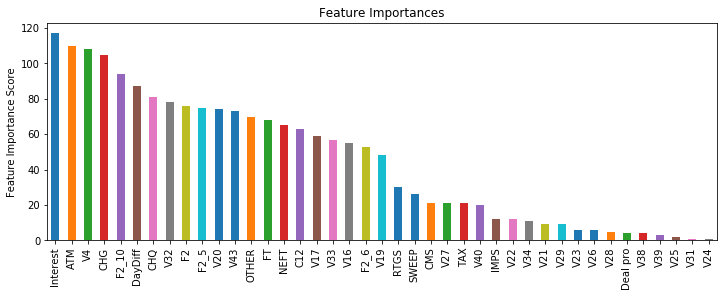

In [257]:
predictors = [x for x in train.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [258]:
pred = xgb1.predict_proba(test)

In [259]:
p2=[row[1] for row in pred]
outdf1=pd.DataFrame({'UID': teuid, 'bad_flag': p2})

In [260]:
outdf1.head()

,UID,bad_flag
0,Te-569,0.103399
1,Te-1542,0.069649
2,Te-1647,0.082350
3,Te-1721,0.075715
4,Te-1930,0.120843


In [261]:
t1 = test_same.merge(train_agg[['V1','V2','bad_flag']] , on = ['V1','V2'],how = 'left')

In [262]:
samepred = t1[['UID','bad_flag']]

In [263]:
diffpred = outdf1.copy()

In [264]:
comb = pd.concat([samepred,diffpred],axis=0)

In [265]:
test_agg1 = test_agg.copy()

In [266]:
test_agg1 = test_agg1.merge(comb,on='UID',how='left')

In [267]:
sub = test_agg1[['UID','bad_flag']]

In [268]:
sub.to_csv('Submission_hdfc.csv',index=False)